In [77]:
pip install wordcloud

     |████████████████████████████████| 363 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import wordcloud

In [79]:
movies = pandas.read_csv("./IMDb_Extensive_Dataset/IMDb movies.csv")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
pandas.DataFrame.head(movies)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


# Año
Empezemos con el año. Podemos ver inicialmente el promedio, el mínimo, y el máximo. Notamos también que es una variable categórica, no necesariamente numérica. 

In [81]:
numeric_year = movies[movies['year'].astype(str).str.isdigit()] # sacar los valores solo numericos de year
np.mean(pandas.to_numeric(numeric_year['year'])) # Promedio de año de películas en la base

1993.5005940317283

In [5]:
pandas.Series.describe(pandas.to_numeric(numeric_year['year']))

# np.mean(numeric_year)

count    85854.000000
mean      1993.500594
std         24.216405
min       1894.000000
25%       1979.000000
50%       2003.000000
75%       2013.000000
max       2020.000000
Name: year, dtype: float64

El año promedio parece ser $1993$ indicando que hay un sesgo hacia las películas más nuevas. El año de la película más vieja es $1994$, y el de la película más nueva en la base de datos es $2020$. Para poder entender mejor los datos de año, podemos ver su historgrama. 

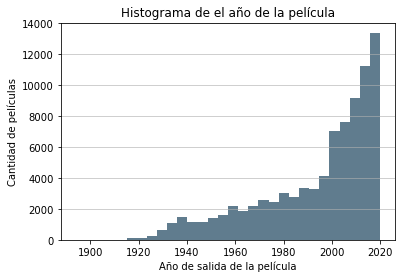

In [6]:
anos = pandas.Series(pandas.to_numeric(numeric_year['year']))

anos.plot.hist(grid=False, bins=30,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

La explosión más importante parece ser alrededor del año 2000, donde se empiezan a producir muchas más películas que en la década pasada. Se puede también notar que el valor de $1894$ es extremadamente atípico, y hay muy pocas películas en general hechas antes de 1910. 

In [7]:
diferencia_year = pandas.Series.dropna(pandas.Series.diff(numeric_year.groupby('year').count()['title']))
pandas.Series.describe(diferencia_year)

count     166.000000
mean        2.409639
std       229.842979
min     -1767.000000
25%        -2.000000
50%         3.000000
75%        24.000000
max      1069.000000
Name: title, dtype: float64

Esto nos da mucha información. Tenemos que en promedio la diferencia de un año a otro es relativamente baja (2.4), pero tiene una desviación estándar enorme. Esto es decir, es muy impredecible determinar cuantas películas van a salir un año dado cuantas salieron el año pasado. Hay sesgo hacia más, pero no es seguro. 

# Duración de la película
Ahora, hagamos un análisis inicial de la duración. Es una variable numérica y continua, redondeada a enteros. 

In [8]:
pandas.Series.describe(movies['duration'])

count    85855.000000
mean       100.351418
std         22.553848
min         41.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        808.000000
Name: duration, dtype: float64

Podemos ver que la duración es una variable muy estable, donde la desviación estándar es de solo 22 minutos, es decir, la mayoría de las películas en la base de datos están alrededor de entre los 80 minutos y los 120 minutos de duración. Hay un dato extremadamente atípico, que es el máximo, de 808 minutos. Veamos que película es. También chequemos la película con la duración más corta.

In [9]:
movies[movies['duration'] > 800]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
85057,tt9047474,La flor,La flor,2016,2018-09-21,"Drama, Fantasy, Musical",808,Argentina,"Catalan, Spanish, French, English, Russian, Ge...",Mariano Llinás,...,"Elisa Carricajo, Valeria Correa, Pilar Gamboa,...","A film in six episodes, connected by the same ...",7.7,473,NaN,$ 4032,$ 4032,77.0,5.0,23.0


In [10]:
movies[movies['duration'] < 42]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
32798,tt0142235,Dragon Ball Z: La vendetta divina,Doragon bôru Z,1989,1989-07-15,"Animation, Action, Adventure",41,Japan,Japanese,Daisuke Nishio,...,"Masako Nozawa, Toshio Furukawa, Hiromi Tsuru, ...",In order to wish for immortality and avenge hi...,7.0,6042,NaN,NaN,$ 9060335,NaN,17.0,4.0


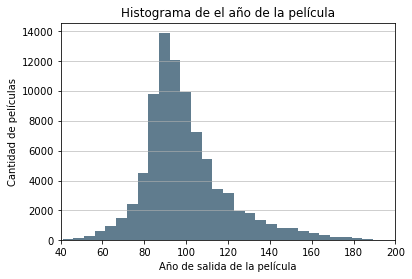

In [11]:
movies['duration'].plot.hist(grid=False, bins=150,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.xlim(xmin = 40, xmax = 200)
plt.grid(axis='y', alpha=0.75)

In [12]:
movies[movies['duration'] > 200]['title'].count() # Cantidad de películas con duración mayor a 200 minutos. 

240

Algo importante a notar aquí es que estamos quitando algunos valores muy altos de este histograma ya que si no no se ve bien. Estos son los mayores a 200 minutos de película. Hay 240 películas que cumplen esto, y no se ven en el histograma. 

# Budget
Mientras que de las variables hasta ahora tenemos mucha información, la variable de budget presenta varios problemas importantes. 

* Hay monedas que no son dólares
* Inflación es algo que tenemos que considerar. 
* Cantidad de NAs. 

In [13]:
movies['budget'].isna().sum()

62145

Aquí podemos ver el problema de NAs que se mencionó. Hay $62145$ películas sin registro de budget. En total, hay $85854$ películas en la base de datos, entonces solamente tenemos registro de budget de alrededor de $27\%$ de ellas. Podemos trabajar con ellas, pero el problema es que hay una correlación entre si tiene budget o no, y el año en el que salieron las películas. 

Inicialmente, comenzamos viendo los valores que están en dólares. Prdemos mucha información, en este caso, solamente $16602$ películas tienen el budget en dólares americanos, pero nos sirve para punto de partida para entender los datos y su distribución. 

In [14]:
budget_series = pandas.Series.dropna(movies['budget'])
budget_series = budget_series[budget_series.astype('str').str.contains("$", regex = False)]
budget_series = pandas.to_numeric(pandas.Series(budget_series.astype(str).str.extract('(\d+)')[0]))

pandas.Series.describe(budget_series)

count    1.660200e+04
mean     1.439146e+07
std      2.889929e+07
min      0.000000e+00
25%      7.500000e+05
50%      3.000000e+06
75%      1.500000e+07
max      3.560000e+08
Name: 0, dtype: float64

Notamos que el mínimo es $0$, que tiene mucho sentido. Seguramente hay muchas películas con budget de $0$ dólares que eventualmente ganan aunque sea un poco de dinero. Eso es algo a considerar en nuestro modelo futuro. Veamos algunas películas con budget de 0. 

Continuamos con un historgrama de los datos. 

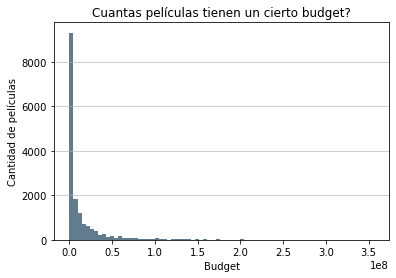

In [15]:
budget_series.plot.hist(grid=False, bins=75,
                   color='#607c8e')
plt.title('Cuantas películas tienen un cierto budget?')
plt.xlabel('Budget')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Es muy fácil ver que la gran mayoría de las películas tienen un budget relativamente pequeño. Mientras esta gráfica es informativa, es terriblemente difícil de interpretar por la naturaleza de los datos. Esta distribución de datos es claramente exponencial, y podemos aplicarle logaritmo para ver patrones más claramente. Notamos que quitamos las películas con budget $0$ ya que si no se indefine la función. 

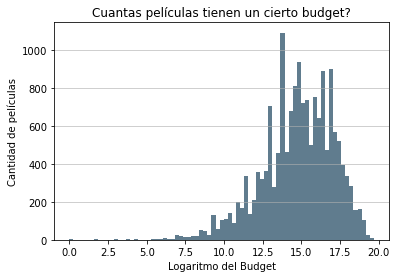

In [16]:
np.log(budget_series[budget_series > 0]).plot.hist(grid=False, bins=75,
                   color='#607c8e')
plt.title('Cuantas películas tienen un cierto budget?')
plt.xlabel('Logaritmo del Budget')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Aquí hay una distribución de datos mucho más trabajable, parecería hasta normal, con una cola bastante pesada hacia atrás. Esto es muy parecido a una Gamma. Con esto podemos hacer mucho.

# USA Income

De la mano del budget, otra variable que inicialmente tienen los mismos problemas es la de `usa_gross_income`. Lo bueno es que como tiene la misma estructura que la de `budget`, se puede trabajar básicamente igual para ver su estructura.

In [17]:
usa_income_series = pandas.Series.dropna(movies['usa_gross_income'])
usa_income_series = usa_income_series[usa_income_series.astype('str').str.contains("$", regex = False)]
usa_income_series = pandas.to_numeric(pandas.Series(usa_income_series.astype(str).str.extract('(\d+)')[0]))

pandas.Series.describe(usa_income_series)

count    1.532100e+04
mean     1.949752e+07
std      4.825059e+07
min      3.000000e+01
25%      9.329200e+04
50%      1.315498e+06
75%      1.712799e+07
max      9.366622e+08
Name: 0, dtype: float64

Salta mucho el hecho de que se tiene una desviación estándar enorme, lo cual indica que tal vez tenemos mucho sesgo hacia un lado. Los cuantíles lo reglejan, pero se ve más claramente en otro histograma. Además, el mínimo es de $30$ dólares, que es algo interesante. No hay casos en los que la película no ganó nada de dinero (de los que registraron en dólares). 

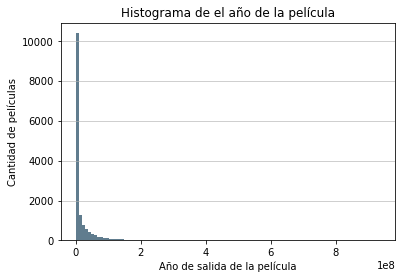

In [18]:
usa_income_series.plot.hist(grid=False, bins=100,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Este comportamiento de los datos es extremadamente parecido al de budget, que tiene sentido. Aquí inicialmente podemos ver correlación, la cual podemos verificar. 

In [19]:
usa_income_series.corr(budget_series)

0.6915700258277483

Vemos una correlación de casi el $70\%$ ! La variable de budget resultará muy util cuando queramos hacer predicciones del budget de una película. Continuamos haciendo lo mismo de antes, aplicando un logaritmo a los datos de `usa_gross_income` para transformarlos a algo más digerible. 

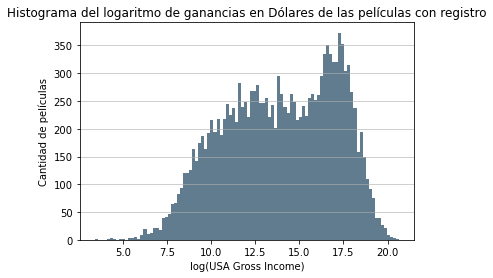

In [20]:
np.log(usa_income_series).plot.hist(grid=False, bins=100,
                   color='#607c8e')
plt.title('Histograma del logaritmo de ganancias en Dólares de las películas con registro')
plt.xlabel('log(USA Gross Income)')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Este es uno de los resultados más interesantes de este archivo. Parece bastante claro aquí que hay una mezcla de distribuciones, dos de ellas. Parecen normales, una con una desviación estándar mucho más baja que la otra pero con mayor media. Idealmente, si se quiere hacer una película, se quisiera estar en ese pico. Hay que analizar esto y ver que factores afectan esto. Por ejemplo, si es de acción. 

# Worldwide Gross Income

Otra variable que representa lo que gana una película. Esta vez, en el extranjero. Usemos el mismo análisis que en `usa_gross_income` para ver el comportamiento general de esta variable. 

In [21]:
worldwide_income_series = pandas.Series.dropna(movies['worlwide_gross_income'])
worldwide_income_series = worldwide_income_series[worldwide_income_series.astype('str').str.contains("$", regex = False)]
worldwide_income_series = pandas.to_numeric(pandas.Series(worldwide_income_series.astype(str).str.extract('(\d+)')[0]))

pandas.Series.describe(worldwide_income_series)

count    3.095500e+04
mean     2.252786e+07
std      8.881907e+07
min      1.000000e+00
25%      1.149520e+05
50%      1.108231e+06
75%      8.299774e+06
max      2.797801e+09
Name: 0, dtype: float64

Algo interesante aquí es que tenemos alrededor del doble de entradas que cumplen que tienen registrado un `worlwide_gross_income` (*sic*) que las que tienen un `usa_gross_income`. Esto tiene mucho sentido, ya que podemos asumir que hay muchas películas que nunca salen en Estaods Unidos, pero sería bueno verificarlo luego cuando veamos la variable de `country`. El promedio es más alto, la desviación estándar es casi de $\$90,000,000$ que es altísimo. 

In [22]:
worldwide_income_series.corr(budget_series)

0.7519531533964473

In [23]:
worldwide_income_series.corr(usa_income_series)

0.9323025156959719

Como es de esperarse, la correlación entre `worlwide_gross_income` y `budget` es alta, y de hecho más alta, de $0.75$. Claramente el budget tiene un relación fuerte con cuanto gana una película. Además, vemos que `worlwide_gross_income` y `usa_gross_income` tienen correlación de $0.93$. Esto tiene mucho sentido pero es bueno saber que esa corazonada está bien. Sigamos ahora con el histograma de los datos y de el logaritmo de los datos. 

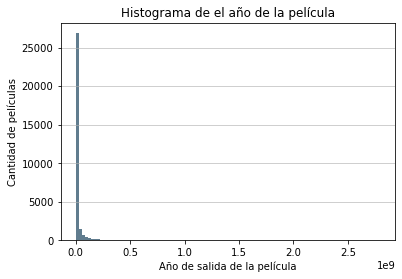

In [24]:
worldwide_income_series.plot.hist(grid=False, bins=100,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Es un comportamiento muy parecido a el visto en `usa_gross_income`, pero como vimos antes, con mucha más varianza. Muchas películas ganan muy poco, y solamente algunas se van a ganar grande. Eso explica también la desviación estándar del problema. Veamos su logaritmo para entender los datos mejor. 

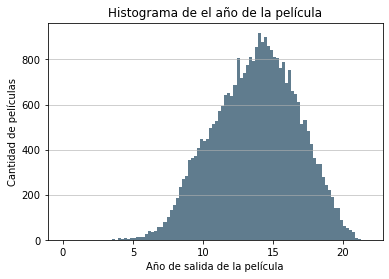

In [25]:
np.log(worldwide_income_series).plot.hist(grid=False, bins=100,
                   color='#607c8e')
plt.title('Histograma de el año de la película')
plt.xlabel('Año de salida de la película')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y', alpha=0.75)

Aquí vemos un comportamiento diferente al caso de `usa_gross_income`, y no parece haber mezcla de distribuciones. Notamos que están centradas en un lugar distinto también que las de `usa_gross_income`. 

# Genre

Aquí llegamos a la primera variable no numérica del análisis, `genre`. Es una variable categórica que 

In [26]:
pandas.Categorical(movies['genre'])
movies['genre'].value_counts()

Drama                         12543
Comedy                         7693
Comedy, Drama                  4039
Drama, Romance                 3455
Comedy, Romance                2508
                              ...  
Mystery, Sci-Fi, Drama            1
Comedy, Adventure, Family         1
Comedy, Musical, Thriller         1
Action, Biography, Western        1
Crime, War                        1
Name: genre, Length: 1257, dtype: int64

Podemos ya empezar a ver problemas. Se pensaría que el género es una variable categórica, pero tenemos $1257$ categorías, muchas más de las que podemos trabajar. Esto viene del problema de mezcla de categorías. Hay películas que son comedias, otras que son dramas, y otras que son drama y comedias. Para resolver esto, lo más sencillo es hacer un nuevo dataframe. 

In [27]:
list = []
for j in movies['genre'].str.rsplit(', '):
    for i in j:
        if i not in list:
            list.append(i)

print(list)

['Romance', 'Biography', 'Crime', 'Drama', 'History', 'Adventure', 'Fantasy', 'War', 'Mystery', 'Horror', 'Western', 'Comedy', 'Family', 'Action', 'Sci-Fi', 'Thriller', 'Sport', 'Animation', 'Musical', 'Music', 'Film-Noir', 'Adult', 'Documentary', 'Reality-TV', 'News']


In [28]:
data = []
for i in range(len(list)):
    data.append(pandas.Series.tolist(movies['genre'].str.contains(list[i], regex = False)))

Genres = pandas.DataFrame.transpose(pandas.DataFrame(data, index = list))
Genres


,Romance,Biography,Crime,Drama,History,Adventure,Fantasy,War,Mystery,Horror,...,Thriller,Sport,Animation,Musical,Music,Film-Noir,Adult,Documentary,Reality-TV,News
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85851,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85852,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
85853,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
Genres.mean().sort_values(ascending=False)

Drama          0.548716
Comedy         0.342065
Romance        0.164557
Action         0.150812
Thriller       0.132642
Crime          0.128903
Horror         0.111316
Adventure      0.088405
Mystery        0.060858
Family         0.046148
Fantasy        0.044400
Music          0.042886
Sci-Fi         0.042024
Biography      0.027686
History        0.026743
War            0.026114
Animation      0.024937
Musical        0.023773
Western        0.018438
Sport          0.012393
Film-Noir      0.007722
Reality-TV     0.000035
Adult          0.000023
Documentary    0.000023
News           0.000012
dtype: float64

<AxesSubplot:>

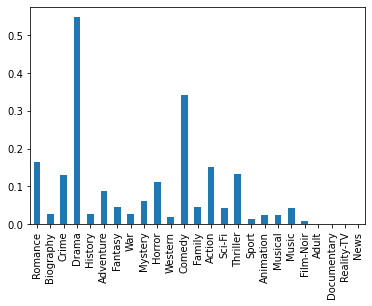

In [30]:
Genres.mean().plot(kind="bar")

# Language

El lenguaje es un factor que puede afectar mucho cuanto gana una película. Limpiemos primero esta variable categórica como limpiamos antes la de `genre`. 

In [31]:
pandas.Categorical(movies['language'])
movies['language'].value_counts()

English                                         35939
French                                           3903
Spanish                                          2831
Japanese                                         2826
Italian                                          2731
                                                ...  
English, German, Portuguese, Turkish, French        1
English, French, Italian, Arabic                    1
English, Japanese, Icelandic                        1
English, French, Greek, Italian                     1
English, Polish, Russian, German                    1
Name: language, Length: 4377, dtype: int64

Se ve el mismo problema de antes, pero esta vez con un sesgo en los datos considerable por el lenguaje de inglés. Veamos que tan alta es esa proporción. Para poder trabajar estos datos, tenemos que quitarles los `NA`s y los valores donde el lenguaje dice `None`. 

In [32]:
Language = pandas.Series.dropna(movies['language'])
Language = Language[Language != "None"]
Language

3              English
4              Italian
5              English
6               German
7              Italian
             ...      
85850           French
85851    German, Dutch
85852        Malayalam
85853          Turkish
85854          Catalan
Name: language, Length: 84954, dtype: object

In [33]:
list_lang = []
for j in Language.str.rsplit(', '):
    for i in j:
        if i not in list_lang:
            list_lang.append(i)

print(list_lang)

['English', 'Italian', 'German', 'Danish', 'French', 'None', 'Hungarian', 'Russian', 'Spanish', 'Dutch', 'Swedish', 'Japanese', 'Latin', 'Greek', 'Yiddish', 'Sign Languages', 'Mandarin', 'Czech', 'Polynesian', 'Cantonese', 'Arabic', 'Vietnamese', 'Romanian', 'Hindi', 'Urdu', 'Portuguese', 'Chinese', 'Mari', 'Swahili', 'Hawaiian', 'Ukrainian', 'Hebrew', 'Sicilian', 'Inuktitut', 'American Sign Language', 'Sioux', 'Turkish', 'Welsh', 'Polish', 'Marathi', 'Finnish', 'Norwegian', 'Esperanto', 'Tagalog', 'Georgian', 'Swiss German', 'Latvian', 'Serbian', 'Indonesian', 'Azerbaijani', 'Scottish Gaelic', 'Bable', 'Nahuatl', 'Flemish', 'Maori', 'Slovenian', 'Catalan', 'Afrikaans', 'Serbo-Croatian', 'Navajo', 'North American Indian', 'Tamil', 'Telugu', 'Bengali', 'Korean', 'Occitan', 'Irish', 'Athapascan languages', 'Basque', 'Albanian', 'Bulgarian', 'Quechua', 'Greenlandic', 'Burmese', 'Thai', 'Armenian', 'Croatian', 'Norse', 'Old', 'Macedonian', 'Slovak', 'Estonian', 'Saami', 'Ladino', 'Indian S

In [34]:
data = []
for i in range(len(list_lang)):
    data.append(pandas.Series.tolist(Language.str.contains(list_lang[i], regex = False)))

Language_df = pandas.DataFrame.transpose(pandas.DataFrame(data, index = list_lang))
Language_df.head()

,English,Italian,German,Danish,French,None,Hungarian,Russian,Spanish,Dutch,...,Oriya,Dinka,Manipuri,Rhaetian,Mixtec,Bemba,Wayuu,Balinese,Soninke,Haida
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
Language_df.mean().sort_values(ascending=False)

English     0.558490
French      0.096028
Spanish     0.066895
Italian     0.055053
German      0.053558
              ...   
Kru         0.000012
Ladakhi     0.000012
Bicolano    0.000012
Parsee      0.000012
Haida       0.000012
Length: 267, dtype: float64

<AxesSubplot:>

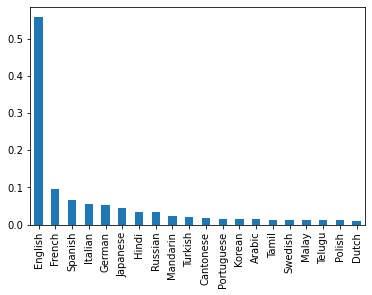

In [36]:
Language_df.mean().sort_values(ascending=False).head(20).plot(kind="bar")

# País

Otra variable categórica como las dos anteriores. Mismo tratamiento. 

In [37]:
pandas.Categorical(movies['country'])
movies['country'].value_counts()

USA                                       28511
India                                      6065
UK                                         4111
Japan                                      3077
France                                     3055
                                          ...  
Denmark, Iceland, Norway                      1
Mexico, France, Belgium, Germany              1
UK, Germany, Kenya, France, USA, China        1
Germany, Ireland, Taiwan                      1
India, Netherlands, Singapore                 1
Name: country, Length: 4907, dtype: int64

In [38]:
Pais = pandas.Series.dropna(movies['country'])
Pais = Pais[Pais != "None"]
Pais

0                     USA
1               Australia
2        Germany, Denmark
3                     USA
4                   Italy
               ...       
85850     France, Belgium
85851         Netherlands
85852               India
85853              Turkey
85854               Spain
Name: country, Length: 85791, dtype: object

In [39]:
list_pais = []
for j in Pais.str.rsplit(', '):
    for i in j:
        if i not in list_pais:
            list_pais.append(i)

print(list_pais)

['USA', 'Australia', 'Germany', 'Denmark', 'Italy', 'Romania', 'France', 'Sweden', 'Belgium', 'Canada', 'Hungary', 'Russia', 'Mexico', 'Norway', 'Japan', 'Austria', 'UK', 'Soviet Union', 'Chile', 'India', 'Switzerland', 'China', 'Hong Kong', 'Spain', 'Czechoslovakia', 'Isle Of Man', 'Brazil', 'Portugal', 'Turkey', 'Argentina', 'Poland', 'Netherlands', 'Finland', 'West Germany', 'Yugoslavia', 'Greece', 'East Germany', 'Egypt', 'Albania', 'Bulgaria', 'Monaco', 'New Zealand', 'Israel', 'Cuba', 'Ireland', 'Philippines', 'South Korea', 'Liechtenstein', 'Croatia', 'South Africa', 'Puerto Rico', 'Malta', 'Algeria', 'Lebanon', 'Sri Lanka', 'Afghanistan', 'Morocco', 'Kyrgyzstan', 'Singapore', 'Taiwan', 'Senegal', 'Bolivia', 'Bermuda', 'Ukraine', 'Mauritania', 'Iran', 'Thailand', 'Iceland', 'Luxembourg', 'Georgia', 'Venezuela', 'Peru', 'Panama', 'Tunisia', 'Haiti', 'Cameroon', 'Syria', 'Angola', 'Jamaica', 'Ecuador', 'Andorra', 'Colombia', 'Bangladesh', 'Ethiopia', 'Indonesia', 'Libya', 'Kuwait'

In [40]:
data = []
for i in range(len(list_pais)):
    data.append(pandas.Series.tolist(Pais.str.contains(list_pais[i], regex = False)))

Pais_df = pandas.DataFrame.transpose(pandas.DataFrame(data, index = list_pais))
Pais_df.head()

,USA,Australia,Germany,Denmark,Italy,Romania,France,Sweden,Belgium,Canada,...,El Salvador,Vanuatu,Belize,Cook Islands,Maldives,Djibouti,Guadeloupe,Malawi,Holy See (Vatican City State),Oman
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
Pais_df.mean().sort_values(ascending=False)

USA              0.400100
France           0.096875
UK               0.087305
India            0.074285
Italy            0.058934
                   ...   
Guinea-Bissau    0.000012
Gibraltar        0.000012
Gabon            0.000012
Suriname         0.000012
Oman             0.000012
Length: 194, dtype: float64

<AxesSubplot:>

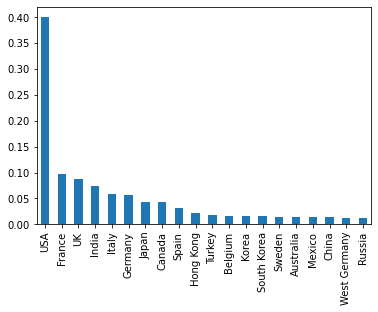

In [42]:
Pais_df.mean().sort_values(ascending=False).head(20).plot(kind="bar")

# Relaciones Entre Variables

Continuamos presentando algunas relaciones importantes, como la que sigue. Vemos los logaritmos de budget contra USA gross income coloreado de acuerdo a worldwide_gross_income. Aquí podemos ver relaciones claras entre las 3 variables. Hay algunos valores atípocos que vale la pena explorar. De nota aquí es que quitamos todas las columnas con valores `NA`, entonces puede haber sesgos que no estemos capturando.

<AxesSubplot:xlabel='budget', ylabel='usa_gross_income'>

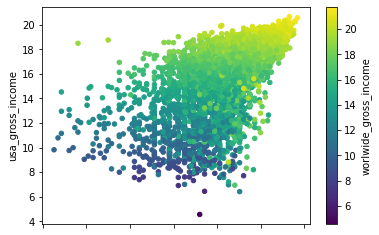

In [43]:
# Scatter Plot para los que tienen ambos

usa_income_series = pandas.Series.dropna(movies['usa_gross_income'])
usa_income_series = usa_income_series[usa_income_series.astype('str').str.contains("$", regex = False)]
usa_income_series = pandas.to_numeric(pandas.Series(usa_income_series.astype(str).str.extract('(\d+)')[0]))

pandas.Series.describe(usa_income_series)

movies_for_corr = pandas.DataFrame.dropna(movies)
movies_for_corr = movies_for_corr[movies_for_corr['budget'].astype('str').str.contains("$", regex = False)]
movies_for_corr['budget'] = pandas.to_numeric(movies_for_corr['budget'].astype(str).str.extract('(\d+)')[0])

movies_for_corr = movies_for_corr[movies_for_corr['usa_gross_income'].astype('str').str.contains("$", regex = False)]
movies_for_corr['usa_gross_income'] = pandas.to_numeric(movies_for_corr['usa_gross_income'].astype(str).str.extract('(\d+)')[0])

movies_for_corr = movies_for_corr[movies_for_corr['worlwide_gross_income'].astype('str').str.contains("$", regex = False)]
movies_for_corr['worlwide_gross_income'] = pandas.to_numeric(movies_for_corr['worlwide_gross_income'].astype(str).str.extract('(\d+)')[0])

movies_for_corr['budget'] = np.log(movies_for_corr['budget'])
movies_for_corr['usa_gross_income'] = np.log(movies_for_corr['usa_gross_income'])
movies_for_corr['worlwide_gross_income'] = np.log(movies_for_corr['worlwide_gross_income'])

movies_for_corr.plot.scatter(x = 'budget',
                            y = 'usa_gross_income',
                            c = 'worlwide_gross_income',
                            colormap = 'viridis'

)


<AxesSubplot:xlabel='duration', ylabel='worlwide_gross_income'>

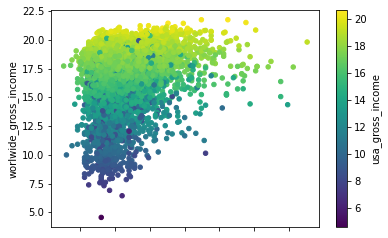

In [44]:
# Tal vez quitar las que ganan muy poco?

movies_for_corr.plot.scatter(x = 'duration',
                            y = 'worlwide_gross_income',
                            c = 'usa_gross_income',
                            colormap = 'viridis'

)

In [57]:
Correlacion_Genero_Voto = [None] * len(list)
j = 0
for i in list:
    Correlacion_Genero_Voto[j] = Genres[i].corr(movies['avg_vote'])
    j = j+1

Correlacion_Genero_Voto
lst = [list, Correlacion_Genero_Voto]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
df

,0,1
3,Drama,0.301094
1,Biography,0.099112
0,Romance,0.086619
4,History,0.086537
7,War,0.070124
17,Animation,0.062502
19,Music,0.058839
20,Film-Noir,0.053245
18,Musical,0.044064
2,Crime,0.03987


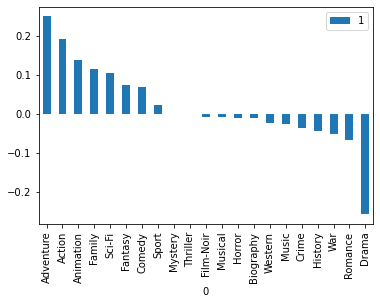

In [73]:
ax = pandas.DataFrame.dropna(df).plot.bar(x=0, y=1)

In [68]:
Correlacion_Genero_Voto = [None] * len(list)
j = 0
for i in list:
    Correlacion_Genero_Voto[j] = Genres[i].corr(movies_for_corr['usa_gross_income'])
    j = j+1

Correlacion_Genero_Voto
lst = [list, Correlacion_Genero_Voto]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
df

,0,1
5,Adventure,0.249387
13,Action,0.190704
17,Animation,0.138968
12,Family,0.115104
14,Sci-Fi,0.105494
6,Fantasy,0.074889
11,Comedy,0.067309
16,Sport,0.02284
8,Mystery,-0.001037
15,Thriller,-0.001037


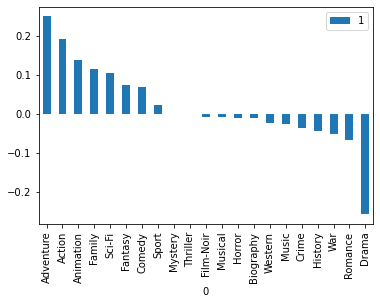

In [70]:
ax = pandas.DataFrame.dropna(df).plot.bar(x=0, y=1)

In [74]:
Correlacion_Genero_Voto = [None] * len(list)
j = 0
for i in list:
    Correlacion_Genero_Voto[j] = Genres[i].corr(movies_for_corr['worlwide_gross_income'])
    j = j+1

Correlacion_Genero_Voto
lst = [list, Correlacion_Genero_Voto]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
df

,0,1
5,Adventure,0.296021
13,Action,0.239016
17,Animation,0.169308
12,Family,0.118394
14,Sci-Fi,0.113876
6,Fantasy,0.084038
11,Comedy,0.022221
15,Thriller,0.01243
8,Mystery,0.008838
16,Sport,-0.002366


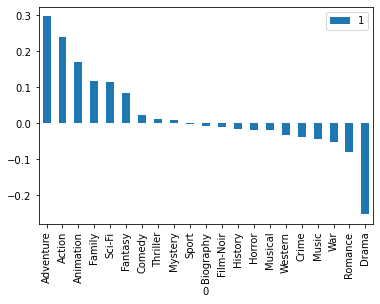

In [75]:
ax = pandas.DataFrame.dropna(df).plot.bar(x=0, y=1)

In [48]:
Correlacion_Lenguaje_Voto = [None] * len(list_lang)
j = 0
for i in list_lang:
    Correlacion_Lenguaje_Voto[j] = Language_df[i].corr(movies_for_corr['worlwide_gross_income'])
    j = j+1

Correlacion_Lenguaje_Voto
lst = [list_lang, Correlacion_Lenguaje_Voto]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
pandas.DataFrame.dropna(df)

,0,1
40,Finnish,0.030759
26,Chinese,0.025471
49,Azerbaijani,0.024953
52,Nahuatl,0.022157
45,Swiss German,0.020978
...,...,...
128,Klingon,-0.022723
156,Bosnian,-0.023737
28,Swahili,-0.023959
197,Lingala,-0.027609


In [49]:
Correlacion_Lenguaje_Voto = [None] * len(list_lang)
j = 0
for i in list_lang:
    Correlacion_Lenguaje_Voto[j] = Language_df[i].corr(movies_for_corr['usa_gross_income'])
    j = j+1

Correlacion_Lenguaje_Voto
lst = [list_lang, Correlacion_Lenguaje_Voto]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
pandas.DataFrame.dropna(df)

,0,1
40,Finnish,0.030726
49,Azerbaijani,0.024682
45,Swiss German,0.024249
52,Nahuatl,0.021403
2,German,0.021143
...,...,...
22,Romanian,-0.02075
224,Low German,-0.022998
152,Spanish Sign Language,-0.02683
197,Lingala,-0.030237


In [50]:
Correlacion_Pais_USA_income = [None] * len(list_pais)
j = 0
for i in list_pais:
    Correlacion_Pais_USA_income[j] = Pais_df[i].corr(movies_for_corr['usa_gross_income'])
    j = j+1

Correlacion_Lenguaje_Voto
lst = [list_pais, Correlacion_Pais_USA_income]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
pandas.DataFrame.dropna(df)

,0,1
0,USA,0.144232
51,Malta,0.029337
127,Czech Republic,0.024944
84,Indonesia,0.023496
140,Pakistan,0.020444
...,...,...
42,Israel,-0.046992
3,Denmark,-0.049599
6,France,-0.050929
23,Spain,-0.051448


In [51]:
Correlacion_Pais_USA_income = [None] * len(list_pais)
j = 0
for i in list_pais:
    Correlacion_Pais_USA_income[j] = Pais_df[i].corr(movies_for_corr['worlwide_gross_income'])
    j = j+1

Correlacion_Lenguaje_Voto
lst = [list_pais, Correlacion_Pais_USA_income]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
pandas.DataFrame.dropna(df)

,0,1
0,USA,0.054506
127,Czech Republic,0.039681
51,Malta,0.035109
1,Australia,0.03055
84,Indonesia,0.028974
...,...,...
4,Italy,-0.029544
54,Sri Lanka,-0.032351
42,Israel,-0.038046
48,Croatia,-0.03885


In [52]:
Correlacion_Pais_USA_income = [None] * len(list_pais)
j = 0
for i in list_pais:
    Correlacion_Pais_USA_income[j] = Pais_df[i].corr(movies_for_corr['avg_vote'])
    j = j+1

Correlacion_Lenguaje_Voto
lst = [list_pais, Correlacion_Pais_USA_income]

df = pandas.DataFrame.transpose(pandas.DataFrame(lst)).sort_values(by = [1], ascending = False)
pandas.DataFrame.dropna(df)

,0,1
16,UK,0.072452
33,West Germany,0.055192
6,France,0.050537
41,New Zealand,0.033375
44,Ireland,0.031043
...,...,...
2,Germany,-0.029476
0,USA,-0.031178
160,Qatar,-0.035676
97,Dominican Republic,-0.046637


<AxesSubplot:xlabel='avg_vote', ylabel='usa_gross_income'>

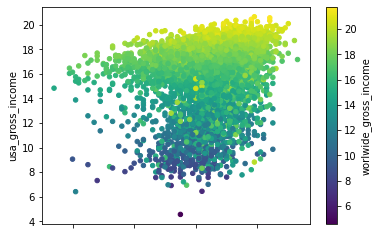

In [54]:
movies_for_corr.plot.scatter(x = 'avg_vote',
                            y = 'usa_gross_income',
                            c = 'worlwide_gross_income',
                            colormap = 'viridis'

)

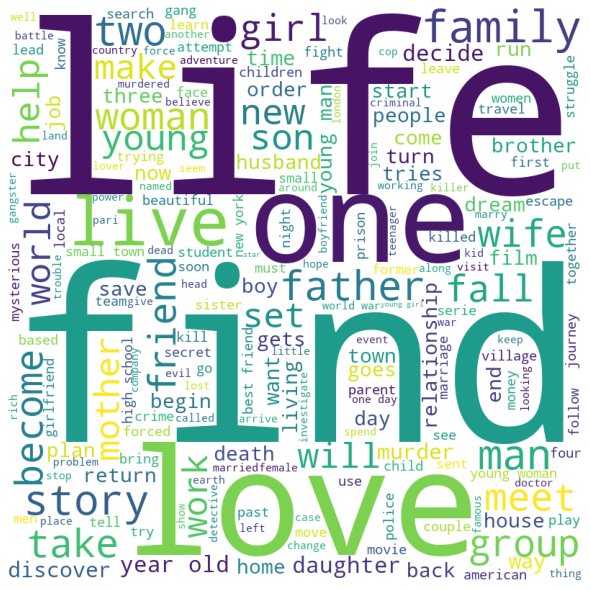

In [88]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

df = movies
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in pandas.Series.dropna(df['description']):
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()